# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/04_eigenvalues_eigenvectors`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/04_eigenvalues_eigenvectors/01_introduction.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# Eigenvalues and Eigenvectors

This notebook introduces the fundamental concepts of eigenvalues and eigenvectors, which are among the most important topics in linear algebra with widespread applications in data science, physics, engineering, and computer science.

## What are Eigenvalues and Eigenvectors?

An **eigenvector** of a square matrix $A$ is a non-zero vector $\mathbf{v}$ such that when $A$ is multiplied by $\mathbf{v}$, the result is a scalar multiple of $\mathbf{v}$. This scalar is called the **eigenvalue** corresponding to $\mathbf{v}$.

Mathematically, this is expressed as:

$$A\mathbf{v} = \lambda\mathbf{v}$$

where:
- $A$ is a square matrix
- $\mathbf{v}$ is the eigenvector (a non-zero vector)
- $\lambda$ is the eigenvalue (a scalar)

Intuitively, eigenvectors are special directions in which the linear transformation represented by matrix $A$ acts by only stretching or shrinking (and possibly flipping), without changing the direction. The eigenvalue tells us by how much the vector is stretched or shrunk.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.5)


## Computing Eigenvalues and Eigenvectors

Let's compute the eigenvalues and eigenvectors of a simple 2×2 matrix using PyTorch:


In [2]:
# Create a 2×2 matrix
A = torch.tensor([
    [4.0, 2.0],
    [1.0, 3.0]
])

print("Matrix A:")
print(A)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eig(A)

# Convert to real if the eigenvalues and eigenvectors are real
# Handle complex type explicitly
eigenvalues_imag = eigenvalues.imag
is_real = torch.max(torch.abs(eigenvalues_imag)) < 1e-6
if is_real:
    eigenvalues = eigenvalues.real
    eigenvectors = eigenvectors.real

print("\nEigenvalues:")
for i, eigval in enumerate(eigenvalues):
    print(f"λ{i+1} = {eigval.item():.4f}")

print("\nEigenvectors (as columns):")
print(eigenvectors)


Matrix A:
tensor([[4., 2.],
        [1., 3.]])

Eigenvalues:
λ1 = 5.0000
λ2 = 2.0000

Eigenvectors (as columns):
tensor([[ 0.8944, -0.7071],
        [ 0.4472,  0.7071]])


### Verification

Let's verify that the eigenvectors and eigenvalues satisfy the equation $A\mathbf{v} = \lambda\mathbf{v}$:


In [3]:
# Verify the eigenvector property: A*v = lambda*v
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    Av = A @ v
    lambda_v = eigenvalues[i] * v
    
    print(f"\nFor eigenvector {i+1}:")
    print(f"v{i+1} = {v}")
    print(f"A·v{i+1} = {Av}")
    print(f"λ{i+1}·v{i+1} = {lambda_v}")
    print(f"A·v{i+1} ≈ λ{i+1}·v{i+1}? {torch.allclose(Av, lambda_v, atol=1e-5)}")



For eigenvector 1:
v1 = tensor([0.8944, 0.4472])
A·v1 = tensor([4.4721, 2.2361])
λ1·v1 = tensor([4.4721, 2.2361])
A·v1 ≈ λ1·v1? True

For eigenvector 2:
v2 = tensor([-0.7071,  0.7071])
A·v2 = tensor([-1.4142,  1.4142])
λ2·v2 = tensor([-1.4142,  1.4142])
A·v2 ≈ λ2·v2? True


## Visualizing Eigenvectors and Eigenvalues

The best way to understand eigenvectors is to visualize them. Let's see how our matrix $A$ transforms vectors in 2D space, with special attention to the eigenvectors:


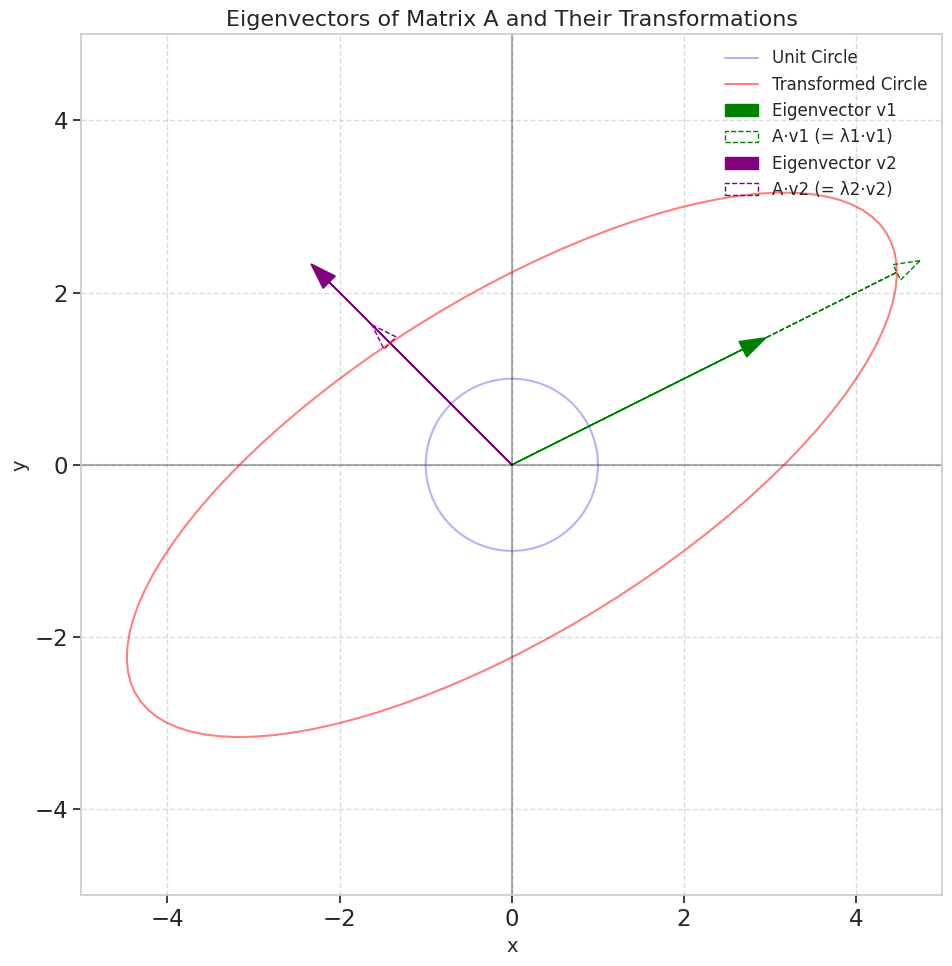

In [4]:
def plot_eigenvectors(A, eigenvalues, eigenvectors):
    """
    Visualize eigenvectors and their transformation by matrix A.
    """
    # Create a figure
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Set limits
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add axes
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Plot a unit circle and its transformation
    theta = np.linspace(0, 2*np.pi, 100)
    circle_x = np.cos(theta)
    circle_y = np.sin(theta)
    
    # Combine into a matrix of column vectors
    circle_vectors = np.vstack([circle_x, circle_y])
    
    # Transform each vector by A
    transformed_vectors = A @ torch.tensor(circle_vectors, dtype=torch.float32)
    
    # Plot the unit circle
    ax.plot(circle_x, circle_y, 'b-', alpha=0.3, label='Unit Circle')
    
    # Plot the transformed circle
    ax.plot(transformed_vectors[0, :], transformed_vectors[1, :], 'r-', alpha=0.5, 
            label='Transformed Circle')
    
    # Plot eigenvectors and their transformations
    colors = ['green', 'purple']
    for i in range(len(eigenvalues)):
        v = eigenvectors[:, i]
        eigenvalue = eigenvalues[i]
        
        # Scale eigenvector for visualization
        scale = 3.0
        v_scaled = scale * v
        
        # Plot eigenvector
        ax.arrow(0, 0, v_scaled[0], v_scaled[1], head_width=0.2, head_length=0.3, 
                fc=colors[i], ec=colors[i], label=f'Eigenvector v{i+1}')
        
        # Plot transformed eigenvector (should be in the same direction, scaled by eigenvalue)
        v_transformed = A @ v
        # Use a different arrow style for the transformed vector
        ax.arrow(0, 0, v_transformed[0], v_transformed[1], head_width=0.2, head_length=0.3, 
                fc='none', ec=colors[i], linestyle='--', 
                label=f'A·v{i+1} (= λ{i+1}·v{i+1})')
    
    # Add legend, title and labels
    ax.set_title(f'Eigenvectors of Matrix A and Their Transformations', fontsize=16)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.legend(loc='upper right', fontsize=12)
    
    # Equal aspect ratio
    ax.set_aspect('equal')
    
    plt.tight_layout()
    return fig, ax

# Plot eigenvectors
plot_eigenvectors(A, eigenvalues, eigenvectors)
plt.show()


In the visualization above:

- The blue circle is the unit circle, representing all vectors of length 1 in different directions.
- The red ellipse shows how the unit circle is transformed by matrix A.
- The colored arrows represent the eigenvectors, and the dashed arrows show the result of multiplying these eigenvectors by A.
- Notice that the transformed eigenvectors remain in the same direction as the original eigenvectors, only scaled by the eigenvalues.

## Geometric Interpretation

Eigenvectors represent special directions where the linear transformation only scales the vector (multiplies its length by the eigenvalue) without changing its direction (or possibly flipping it).

Let's examine how different types of 2×2 matrices transform space, and what their eigenvectors represent:


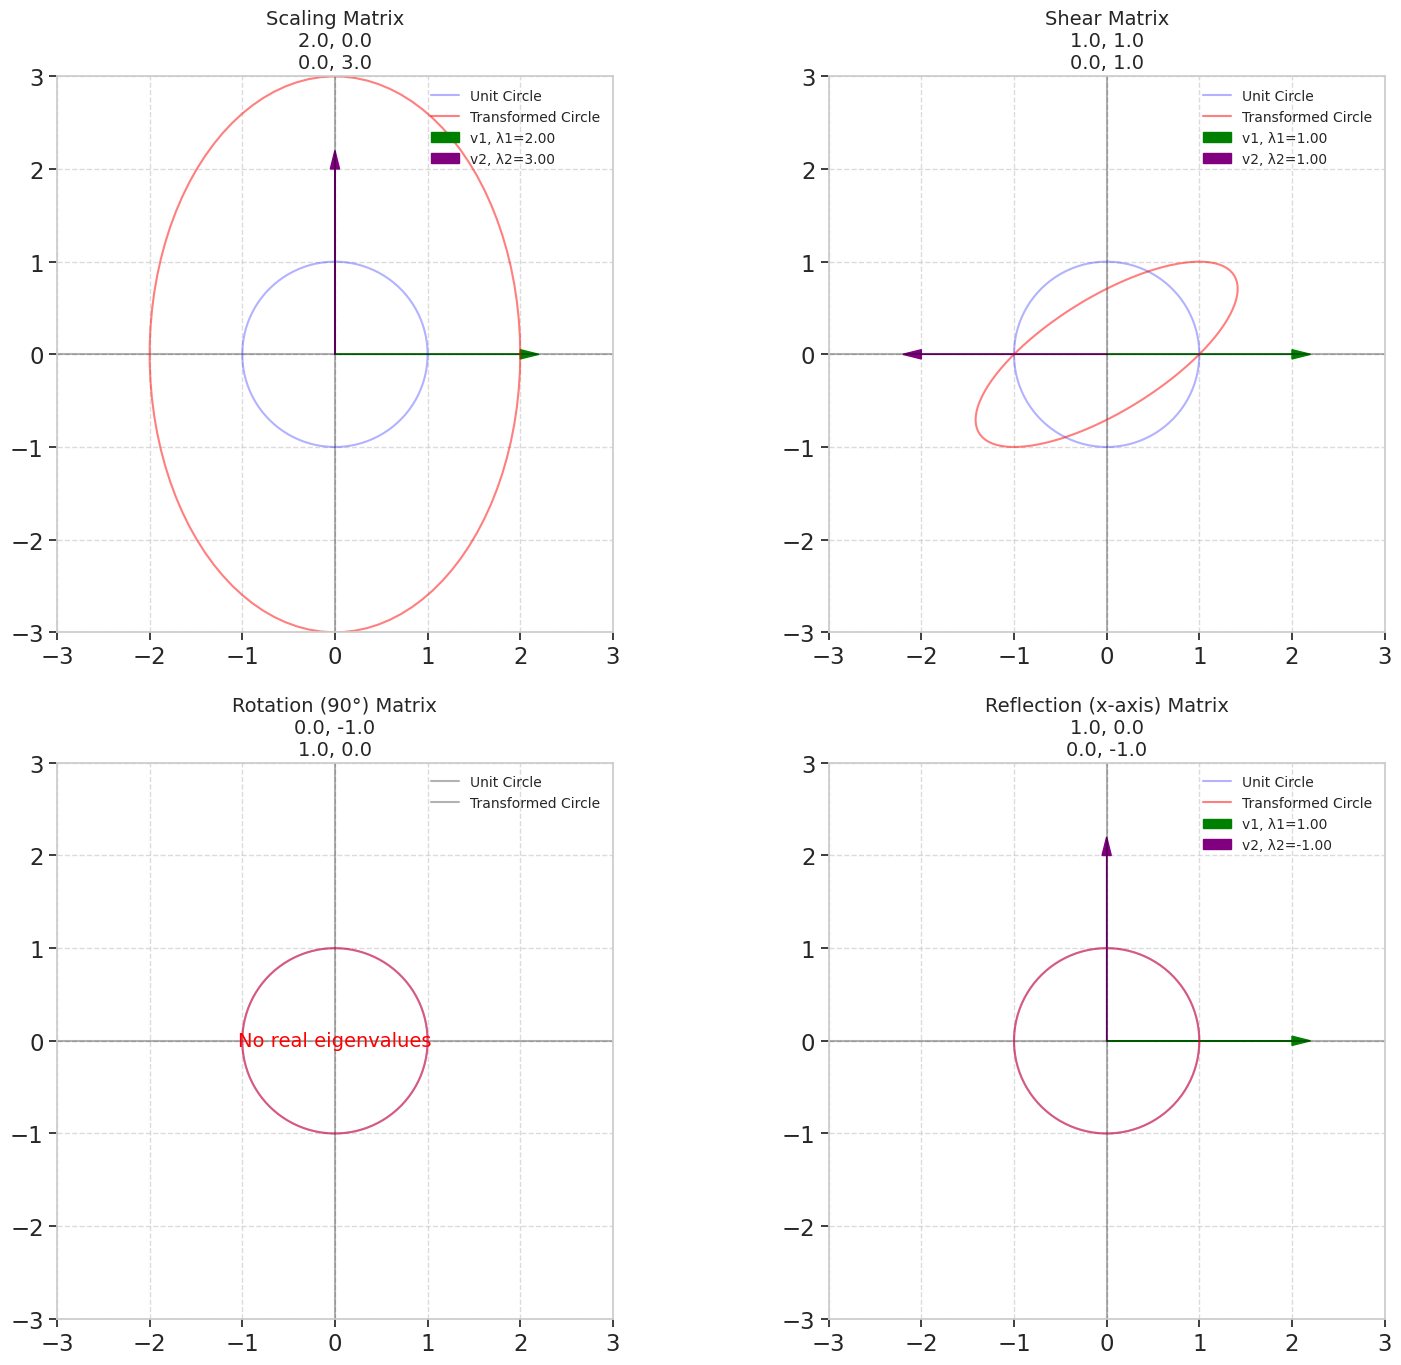

In [5]:
# Create several different 2×2 matrices to demonstrate different transformations
matrices = {
    "Scaling": torch.tensor([
        [2.0, 0.0],
        [0.0, 3.0]
    ]),
    "Shear": torch.tensor([
        [1.0, 1.0],
        [0.0, 1.0]
    ]),
    "Rotation (90°)": torch.tensor([
        [0.0, -1.0],
        [1.0, 0.0]
    ]),
    "Reflection (x-axis)": torch.tensor([
        [1.0, 0.0],
        [0.0, -1.0]
    ])
}

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

# Plot each matrix transformation
for i, (name, matrix) in enumerate(matrices.items()):
    # Compute eigenvalues and eigenvectors
    try:
        eigenvalues, eigenvectors = torch.linalg.eig(matrix)
        
        # Check if eigenvalues are real
        eigenvalues_imag = eigenvalues.imag
        has_real_eigenvalues = torch.max(torch.abs(eigenvalues_imag)) < 1e-6
        
        # Convert to real if all eigenvalues are real
        if has_real_eigenvalues:
            eigenvalues = eigenvalues.real
            eigenvectors = eigenvectors.real
    except:
        # Handle special cases where eigendecomposition might not exist
        has_real_eigenvalues = False
    
    # Create the plot
    ax = axes[i]
    
    # Set limits
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add axes
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Plot a unit circle and its transformation
    theta = np.linspace(0, 2*np.pi, 100)
    circle_x = np.cos(theta)
    circle_y = np.sin(theta)
    
    # Combine into a matrix of column vectors
    circle_vectors = np.vstack([circle_x, circle_y])
    
    # Transform each vector by the matrix
    transformed_vectors = matrix @ torch.tensor(circle_vectors, dtype=torch.float32)
    
    # Plot the unit circle
    ax.plot(circle_x, circle_y, 'b-', alpha=0.3, label='Unit Circle')
    
    # Plot the transformed circle
    ax.plot(transformed_vectors[0, :], transformed_vectors[1, :], 'r-', alpha=0.5, 
            label='Transformed Circle')
    
    # If real eigenvalues exist, plot eigenvectors
    if has_real_eigenvalues:
        colors = ['green', 'purple']
        for j in range(len(eigenvalues)):
            v = eigenvectors[:, j]
            eigenvalue = eigenvalues[j]
            
            # For real eigenvalues (we've already checked in has_real_eigenvalues)
            # Scale eigenvector for visualization
            scale = 2.0
            v_scaled = scale * v
            
            # Plot eigenvector
            ax.arrow(0, 0, v_scaled[0], v_scaled[1], head_width=0.1, head_length=0.2, 
                    fc=colors[j], ec=colors[j], label=f'v{j+1}, λ{j+1}={eigenvalue.item():.2f}')
    
    # Add title
    ax.set_title(f'{name} Matrix\n{matrix[0, 0]:.1f}, {matrix[0, 1]:.1f}\n{matrix[1, 0]:.1f}, {matrix[1, 1]:.1f}', 
                fontsize=14)
    
    # Equal aspect ratio
    ax.set_aspect('equal')
    
    # Add legend
    if has_real_eigenvalues:
        ax.legend(loc='upper right', fontsize=10)
    else:
        ax.legend(['Unit Circle', 'Transformed Circle'], loc='upper right', fontsize=10)
        ax.text(0.5, 0.5, 'No real eigenvalues', horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes, fontsize=14, color='red')

plt.tight_layout()
plt.show()


### Observations from the Visualizations:

1. **Scaling Matrix**: The eigenvectors are aligned with the coordinate axes. When a scaling matrix transforms the unit circle, it becomes an ellipse with semi-axes in the directions of the eigenvectors, with lengths corresponding to the eigenvalues.

2. **Shear Matrix**: One eigenvector is in the direction of invariance (horizontal), while the other reflects the accumulation of shear effect.

3. **Rotation Matrix**: A 90° rotation matrix has no real eigenvalues or eigenvectors because no non-zero vector remains in the same direction after a 90° rotation. Its eigenvalues are complex: $\pm i$.

4. **Reflection Matrix**: The eigenvectors represent the directions that are either preserved or reversed by the reflection. The eigenvalue +1 corresponds to the direction preserved, while -1 corresponds to the direction that is flipped.

## Finding Eigenvectors Using the Power Method

For large matrices, computing all eigenvalues and eigenvectors can be computationally expensive. The **power method** is an iterative algorithm to find the dominant eigenvalue (the one with the largest absolute value) and its corresponding eigenvector.

Let's implement and visualize the power method:


Matrix B:
tensor([[3., 1.],
        [1., 2.]])

Dominant eigenvalue found by power method: 3.618034
Corresponding eigenvector: tensor([0.8507, 0.5257])

Eigenvalues from torch.linalg.eig:
λ1 = 3.618034
λ2 = 1.381966

Eigenvectors from torch.linalg.eig (as columns):
tensor([[ 0.8507, -0.5257],
        [ 0.5257,  0.8507]])


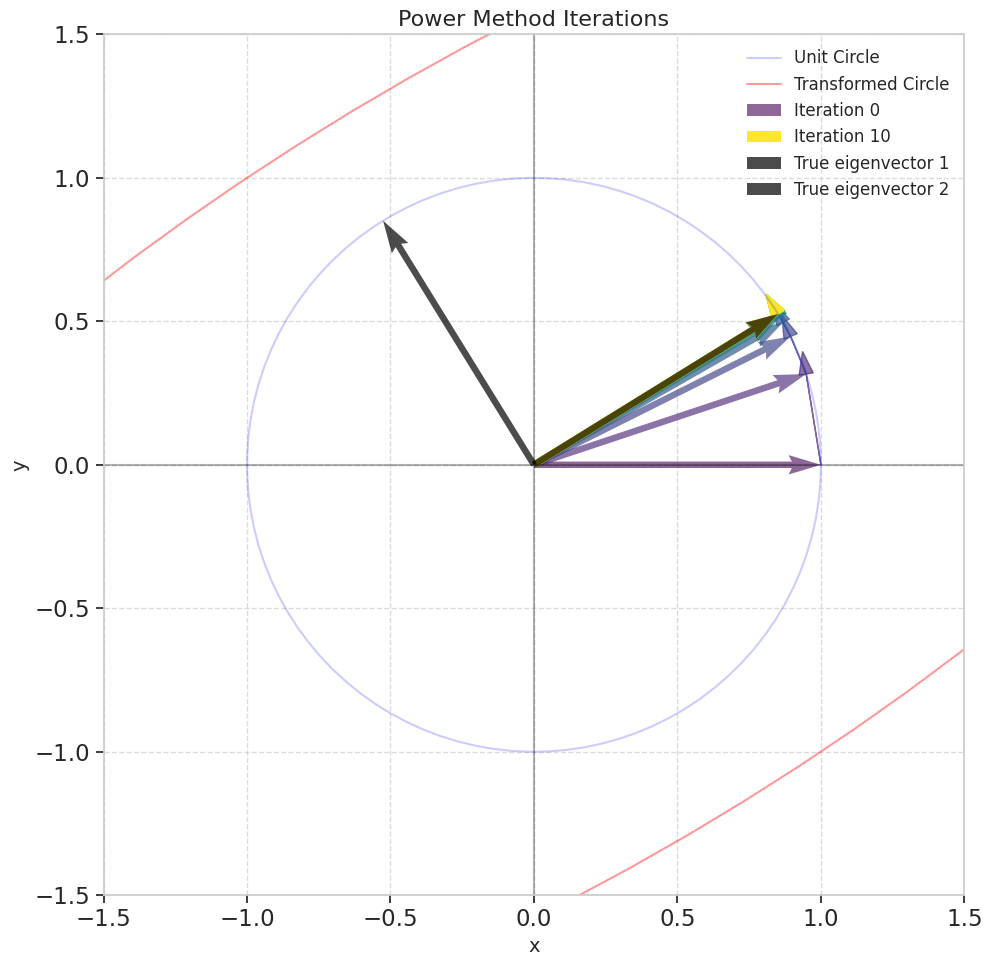

In [6]:
def power_method(A, num_iterations=20, initial_vector=None):
    """
    Implement the power method to find the dominant eigenvalue and eigenvector.
    
    Args:
        A (torch.Tensor): A square matrix
        num_iterations (int): Number of iterations to perform
        initial_vector (torch.Tensor, optional): Initial guess for the eigenvector
        
    Returns:
        tuple: (dominant eigenvalue, dominant eigenvector, history of vectors)
    """
    n = A.shape[0]
    
    # Initialize with a random vector if not provided
    if initial_vector is None:
        v = torch.randn(n)
    else:
        v = initial_vector.clone()
    
    # Normalize the initial vector
    v = v / torch.norm(v)
    
    # Store history for visualization
    vector_history = [v.clone()]
    
    # Perform iterations
    for i in range(num_iterations):
        # Apply the matrix
        v_new = A @ v
        
        # Normalize
        v_new = v_new / torch.norm(v_new)
        
        # Store for visualization
        vector_history.append(v_new.clone())
        
        # Update v for next iteration
        v = v_new
    
    # Compute the Rayleigh quotient to get the eigenvalue
    eigenvalue = (v @ (A @ v)) / (v @ v)
    
    return eigenvalue, v, vector_history

# Create a matrix with a clear dominant eigenvalue
B = torch.tensor([
    [3.0, 1.0],
    [1.0, 2.0]
])

# Run the power method
initial_v = torch.tensor([1.0, 0.0])  # Start with unit vector along x-axis
eigenvalue, eigenvector, history = power_method(B, num_iterations=10, initial_vector=initial_v)

print(f"Matrix B:\n{B}")
print(f"\nDominant eigenvalue found by power method: {eigenvalue.item():.6f}")
print(f"Corresponding eigenvector: {eigenvector}")

# Verify with torch.linalg.eig
true_eigenvalues, true_eigenvectors = torch.linalg.eig(B)
true_eigenvalues_imag = true_eigenvalues.imag
if torch.max(torch.abs(true_eigenvalues_imag)) < 1e-6:
    true_eigenvalues = true_eigenvalues.real
    true_eigenvectors = true_eigenvectors.real

print("\nEigenvalues from torch.linalg.eig:")
for i, eigval in enumerate(true_eigenvalues):
    print(f"λ{i+1} = {eigval.item():.6f}")

print("\nEigenvectors from torch.linalg.eig (as columns):")
print(true_eigenvectors)

# Visualize the power method iterations
plt.figure(figsize=(12, 10))
ax = plt.subplot(111)

# Set limits
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Add axes
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot the unit circle
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta), np.sin(theta), 'b-', alpha=0.2, label='Unit Circle')

# Plot the transformation of the unit circle by B
circle_vectors = np.vstack([np.cos(theta), np.sin(theta)])
transformed_vectors = B @ torch.tensor(circle_vectors, dtype=torch.float32)
ax.plot(transformed_vectors[0, :], transformed_vectors[1, :], 'r-', alpha=0.4, 
        label='Transformed Circle')

# Plot the iterations of the power method
colors = plt.cm.viridis(np.linspace(0, 1, len(history)))
for i, v in enumerate(history):
    if i > 0:  # Skip plotting the initial vector
        # Plot arrow from previous to current
        plt.arrow(history[i-1][0], history[i-1][1], 
                 v[0]-history[i-1][0], v[1]-history[i-1][1],
                 head_width=0.05, head_length=0.08, fc=colors[i], ec=colors[i], 
                 alpha=0.6 + 0.4 * i / len(history))
    
    # Plot each vector
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
             color=colors[i], alpha=0.6 + 0.4 * i / len(history),
             label=f'Iteration {i}' if i in [0, len(history)-1] else None)

# Plot true eigenvectors
for i in range(len(true_eigenvalues)):
    v = true_eigenvectors[:, i]
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
             color='black', alpha=0.7, linestyle='-',
             label=f'True eigenvector {i+1}')

# Add legend, title and labels
ax.set_title(f'Power Method Iterations', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.legend(loc='upper right', fontsize=12)

# Equal aspect ratio
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


## Applications of Eigenvalues and Eigenvectors

### Principal Component Analysis (PCA)

One of the most important applications of eigenvalues and eigenvectors is in Principal Component Analysis (PCA), a dimensionality reduction technique.

PCA works by:
1. Computing the covariance matrix of the data
2. Finding the eigenvalues and eigenvectors of this covariance matrix
3. Using the eigenvectors corresponding to the largest eigenvalues as the principal components

Let's implement PCA on a simple 2D dataset:


Covariance matrix:
tensor([[1.0889, 0.8291],
        [0.8291, 0.9907]])

Eigenvalues of the covariance matrix:
λ1 = 1.870358
λ2 = 0.209205

Eigenvectors (principal components):
tensor([[-0.7277,  0.6859],
        [-0.6859, -0.7277]])


/tmp/ipykernel_22691/3308584743.py:59: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  scale * np.sqrt(eigenvalues[i]) * eigenvectors[0, i],
/tmp/ipykernel_22691/3308584743.py:60: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  scale * np.sqrt(eigenvalues[i]) * eigenvectors[1, i],


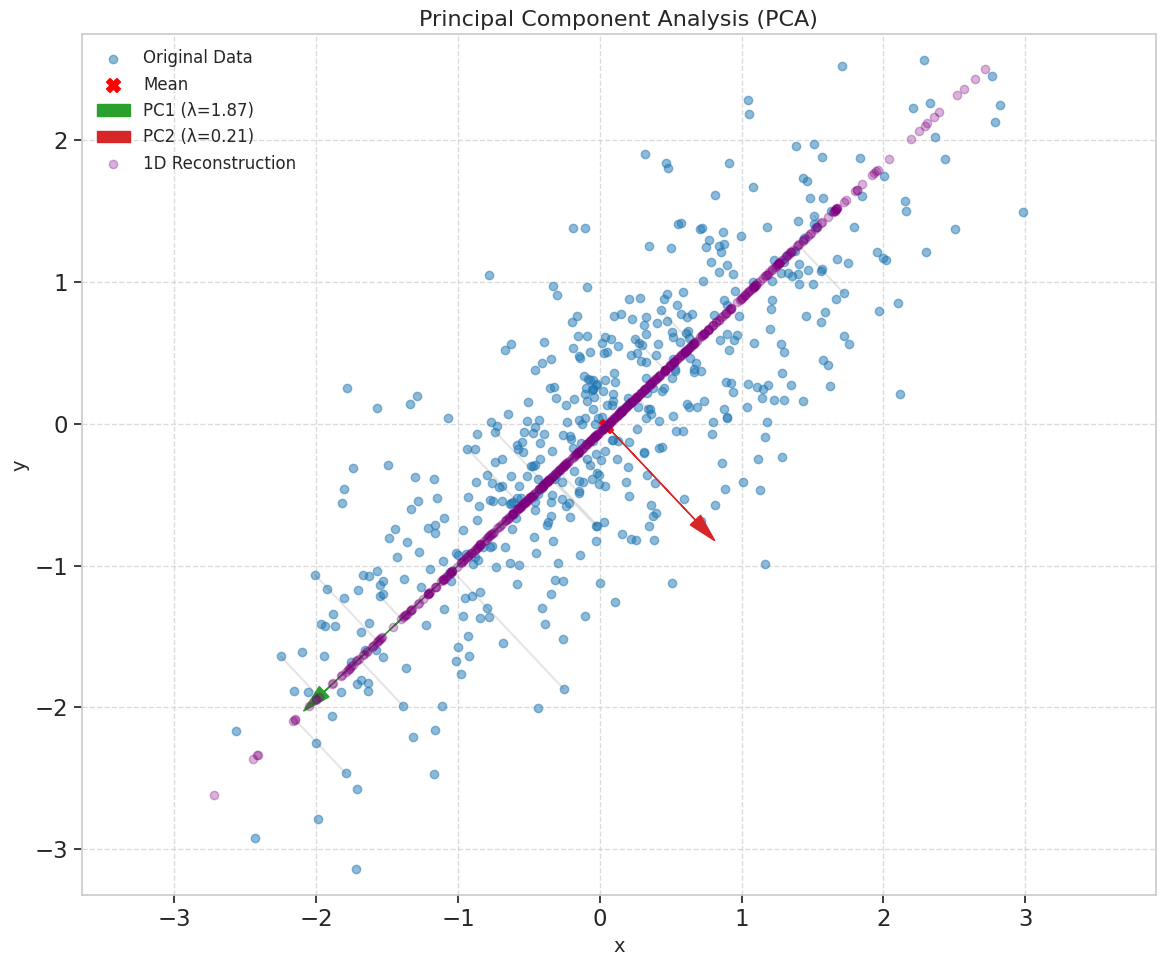

In [7]:
# Generate a synthetic 2D dataset with correlation
def generate_correlated_data(n_samples=500, correlation=0.8):
    """Generate a synthetic 2D dataset with specified correlation"""
    mean = [0, 0]
    cov = [[1, correlation], [correlation, 1]]
    return np.random.multivariate_normal(mean, cov, n_samples)

# Generate data
data = generate_correlated_data(n_samples=500, correlation=0.8)

# Convert to PyTorch tensor
data_tensor = torch.tensor(data, dtype=torch.float32)

# Compute mean and center the data
data_mean = torch.mean(data_tensor, dim=0)
data_centered = data_tensor - data_mean

# Compute the covariance matrix
cov_matrix = (data_centered.T @ data_centered) / (data_centered.shape[0] - 1)

print("Covariance matrix:")
print(cov_matrix)

# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)

# Sort by eigenvalues in descending order
idx = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nEigenvalues of the covariance matrix:")
for i, val in enumerate(eigenvalues):
    print(f"λ{i+1} = {val.item():.6f}")

print("\nEigenvectors (principal components):")
print(eigenvectors)

# Project the data onto the first principal component
first_pc = eigenvectors[:, 0]
projection_1d = data_centered @ first_pc

# Project back to the original space (reconstruction)
reconstruction_1d = torch.outer(projection_1d, first_pc) + data_mean

# Plot the original data, principal components, and projection
plt.figure(figsize=(12, 10))

# Plot original data points
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')

# Plot mean point
plt.scatter(data_mean[0], data_mean[1], color='red', s=100, marker='X', label='Mean')

# Scale eigenvectors for visualization
scale = 2
for i in range(len(eigenvalues)):
    plt.arrow(data_mean[0], data_mean[1], 
              scale * np.sqrt(eigenvalues[i]) * eigenvectors[0, i],
              scale * np.sqrt(eigenvalues[i]) * eigenvectors[1, i],
              head_width=0.1, head_length=0.2, fc=f'C{i+2}', ec=f'C{i+2}',
              label=f'PC{i+1} (λ={eigenvalues[i]:.2f})')

# Plot the 1D reconstruction points
plt.scatter(reconstruction_1d[:, 0], reconstruction_1d[:, 1], 
            color='purple', alpha=0.3, label='1D Reconstruction')

# Connect original points to their 1D reconstruction
for i in range(20):  # Only show a few lines to avoid clutter
    plt.plot([data[i, 0], reconstruction_1d[i, 0]], 
             [data[i, 1], reconstruction_1d[i, 1]], 
             'k-', alpha=0.1)

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Principal Component Analysis (PCA)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()


### Explanation of PCA Visualization:

In the PCA visualization:

- The blue points represent our original correlated 2D data.
- The red X marks the mean of the data.
- The colored arrows show the principal components (eigenvectors of the covariance matrix), scaled by the square root of their eigenvalues.
- The purple points show the reconstruction using only the first principal component.
- The first principal component (PC1) points in the direction of maximum variance in the data.

### Other Applications:

Eigenvalues and eigenvectors have numerous other applications:

1. **Vibration Analysis**: Eigenvectors represent the mode shapes of vibration in mechanical systems, and eigenvalues correspond to the natural frequencies.

2. **Quantum Mechanics**: Eigenvectors of certain operators represent the possible states of a quantum system, and eigenvalues give the possible values of physical observables.

3. **Graph Theory**: The eigenvectors of a graph's adjacency matrix or Laplacian reveal community structures and can be used for spectral clustering.

4. **Markov Processes**: The steady-state distribution of a Markov process is an eigenvector of its transition matrix with eigenvalue 1.

5. **Image Processing**: Eigenfaces (eigenvectors of covariance matrices of face images) are used in facial recognition.

## Conclusion

Eigenvalues and eigenvectors are powerful concepts that help us understand the fundamental behavior of linear transformations. They:

- Reveal the directions in which a linear transformation acts by scaling only
- Simplify complex transformations by identifying special directions
- Allow us to decompose matrices in ways that highlight their essential properties
- Provide the foundation for many algorithms in data science, engineering, and physics

By understanding eigenvalues and eigenvectors geometrically, we gain intuition for matrix operations and their effects in n-dimensional space.